### On va Pratiquer l'algorithme du regression linéaire simple sur l'ensemble de données contient des observations sur le revenu (dans une fourchette de 15 000 $ à 75 000 $) et le bonheur (évalué sur une échelle de 1 à 10) dans un échantillon imaginaire de 500 personnes. 

In [ ]:
%load_ext rpy2.ipython

##Installation des packages

In [ ]:
%%R
install.packages("ggplot2")
install.packages("dplyr")
install.packages("broom")
install.packages("ggpubr")
library(ggplot2)
library(dplyr)
library(broom)
library(ggpubr)

## Chargement du dataset 

In [ ]:
%%R
income.data<-read.csv("/content/income.data.csv")
head(income.data)

  X   income happiness
1 1 3.862647  2.314489
2 2 4.979381  3.433490
3 3 4.923957  4.599373
4 4 3.214372  2.791114
5 5 7.196409  5.596398
6 6 3.729643  2.458556


###Voila un résumé numérique des données. Cela nous indique les valeurs minimale, médiane, moyenne et maximale de la variable indépendante (revenu) et de la variable dépendante (bonheur) :

In [ ]:
%%R
summary(income.data)

       X             income        happiness    
 Min.   :  1.0   Min.   :1.506   Min.   :0.266  
 1st Qu.:125.2   1st Qu.:3.006   1st Qu.:2.266  
 Median :249.5   Median :4.424   Median :3.473  
 Mean   :249.5   Mean   :4.467   Mean   :3.393  
 3rd Qu.:373.8   3rd Qu.:5.992   3rd Qu.:4.503  
 Max.   :498.0   Max.   :7.482   Max.   :6.863  


###La relation entre la variable indépendante et la variable dépendante doit être linéaire. Nous pouvons tester cela visuellement avec un nuage de points pour voir si la distribution des points de données peut être décrite avec une ligne droite. 

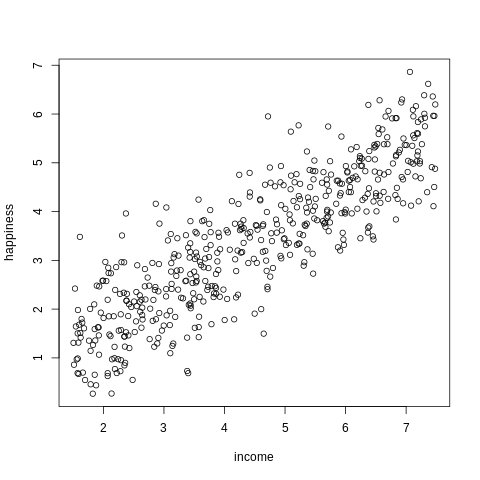

In [ ]:
%%R
plot(happiness ~ income, data = income.data)

###La relation semble à peu près linéaire, nous pouvons donc procéder avec le modèle linéaire.

##Effectuer l'analyse de régression linéaire


####Pour effectuer une simple analyse de régression linéaire et vérifier les résultats, vous devez exécuter deux lignes de code. La première ligne de code crée le modèle linéaire et la deuxième ligne imprime le résumé du modèle :

In [ ]:
%%R
income.happiness.lm <- lm(happiness ~ income, data = income.data)
summary(income.happiness.lm)


Call:
lm(formula = happiness ~ income, data = income.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.02479 -0.48526  0.04078  0.45898  2.37805 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.20427    0.08884   2.299   0.0219 *  
income       0.71383    0.01854  38.505   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7181 on 496 degrees of freedom
Multiple R-squared:  0.7493,	Adjusted R-squared:  0.7488 
F-statistic:  1483 on 1 and 496 DF,  p-value: < 2.2e-16



##Visualisez les résultats avec un graphique 

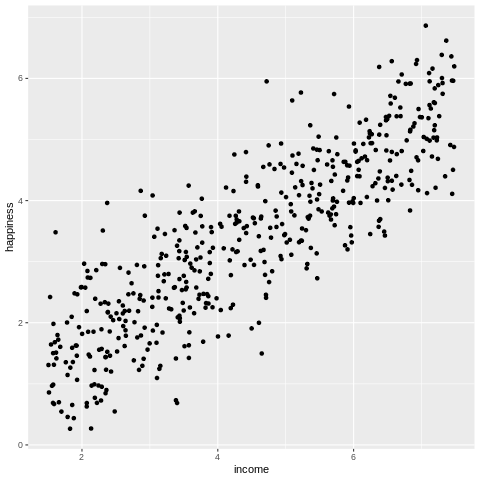

In [ ]:
%%R
income.graph<-ggplot(income.data, aes(x=income, y=happiness))+ geom_point()
income.graph

On Trace le nuage des points sur un graphique

R[write to console]: `geom_smooth()` using formula 'y ~ x'



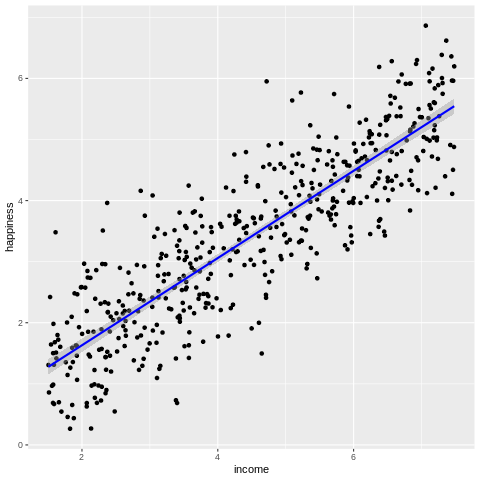

In [ ]:
%%R
income.graph <- income.graph + geom_smooth(method="lm", col="blue")
income.graph

On ajoute la droite de régression linéaire aux données tracées

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



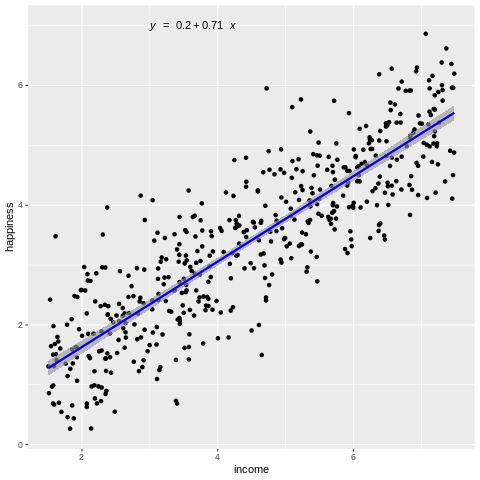

In [ ]:
%%R
income.graph <- income.graph +stat_regline_equation(label.x = 3, label.y = 7)
income.graph

R[write to console]: `geom_smooth()` using formula 'y ~ x'

R[write to console]: `geom_smooth()` using formula 'y ~ x'



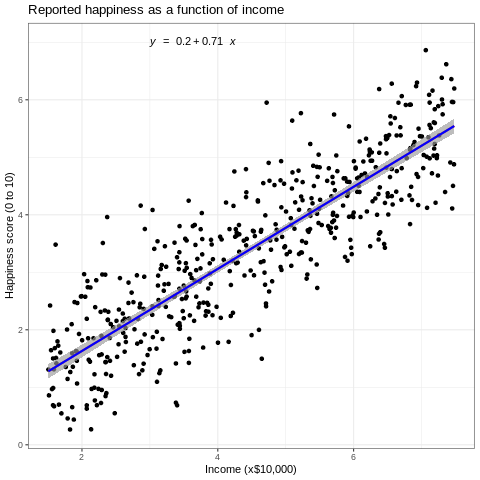

In [ ]:
%%R
income.graph + theme_bw() + labs(title = "Reported happiness as a function of income",
      x = "Income (x$10,000)",
      y = "Happiness score (0 to 10)")

##Préparez le graphique pour la publication

#Conclusion
###L’avantage de l’algorithme de régression linéaire est sa simplicité d’interprétation et sa facilité de calcul.
###Le modèle présente quelques inconvénients comme le fait que l’algorithme est très sensible aux valeurs aberrantes (outliers) des données d’apprentissage d’où la nécessité de bien préparer les données dès le départ. 

